### Laptop Price Prediction
Dataset: [Laptop Price Dataset](https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction)

Dataset Description:
The Dataset emulates laptop prices, capturing various features commonly associated with laptops and their corresponding simulated prices. The dataset encompasses key attribute such as brand, processor speed, RAM size, storage capacity, screen size and weight.

|     Feature     |     Data Type   |  Description   | 
|-----------------|-----------------|----------------|
|      Brand      |      String     |Represents the laptop brand. |
| Processor Speed |       Float     | Indicates the speed of the laptop's processor generated uniformly between 1.5 and 40 GHz |
|   RAM_Size      |        Int      | Represents the random selection of RAM sizes. |
|Storage_Capacity |        Int      | Simulates different storage capacities.| 
|   Screen_Size   |       Float     | Represents the size of the laptop screnn |
|      Weight     |       Float     | Indicates the weight of the laptop in kilograms |
|      Price      |       Float     | Represents laptop price |

Purpose: Performing EDA(Exploratory Data Analysis), data processing and prediction laptop prices base on laptop specifications using machine learning

# Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [ ]:
laptop_df=pd.read_csv("./Dataset/Laptop_price.csv")
laptop_df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# EDA (Exploratory Data Analysis)

## Data Understanding

In [3]:
laptop_df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [4]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
laptop_df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [6]:
Sum_duplicate=laptop_df.duplicated().sum()
print("Sum of Data Duplicate:",Sum_duplicate)

Sum of Data Duplicate: 0


## Visualization

### Visualization of Laptop Brand Name 

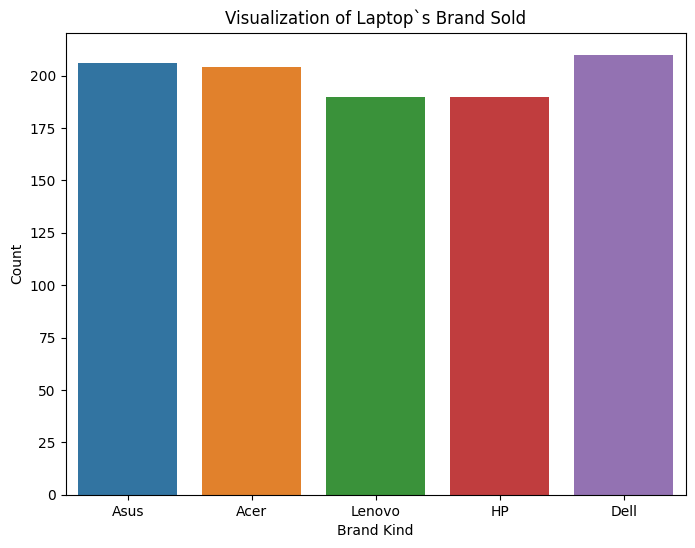

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(data=laptop_df, x='Brand')
plt.title('Visualization of Laptop`s Brand Sold')
plt.xlabel('Brand Kind')
plt.ylabel('Count')
plt.show()

### Visualization of Type Storage Capacity

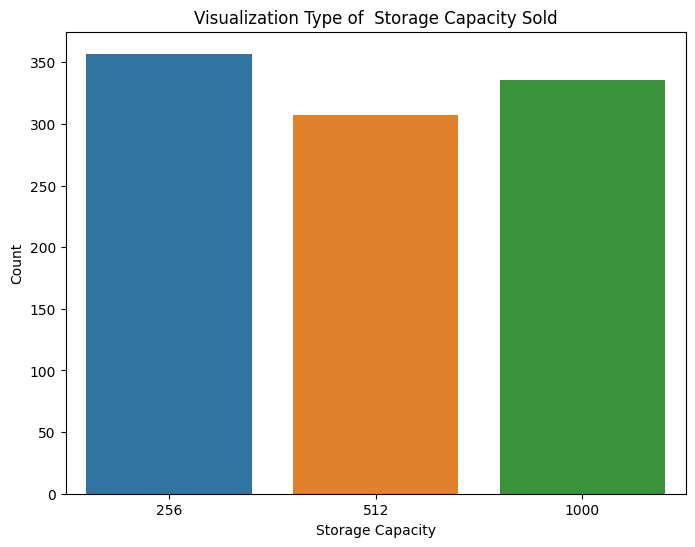

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=laptop_df, x='Storage_Capacity')
plt.title('Visualization Type of  Storage Capacity Sold')
plt.xlabel('Storage Capacity')
plt.ylabel('Count')
plt.show()

### Historical of Numerical Feature

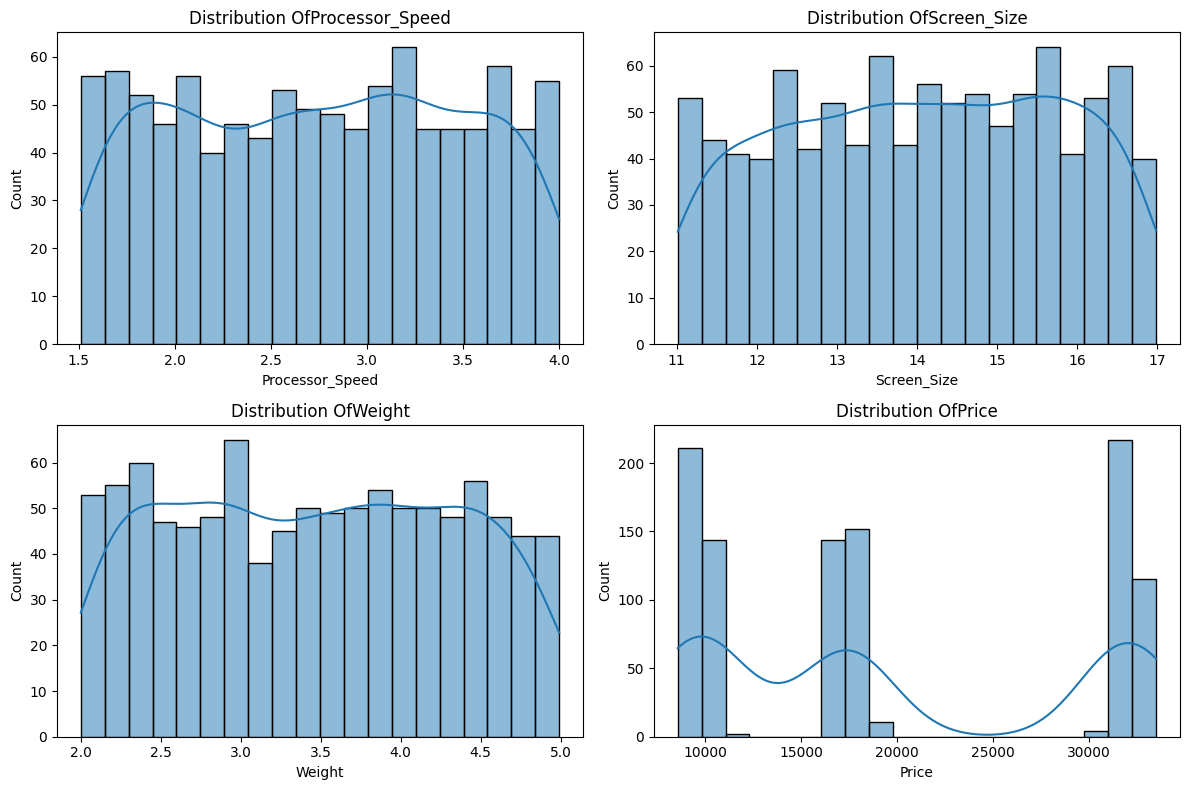

In [9]:
num_cat=['Processor_Speed','Screen_Size','Weight', 'Price']
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.histplot(laptop_df[col], bins=20, kde=True, edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribution Of{col}')
    axs[i].set_xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Boxplot of Numerical Feature

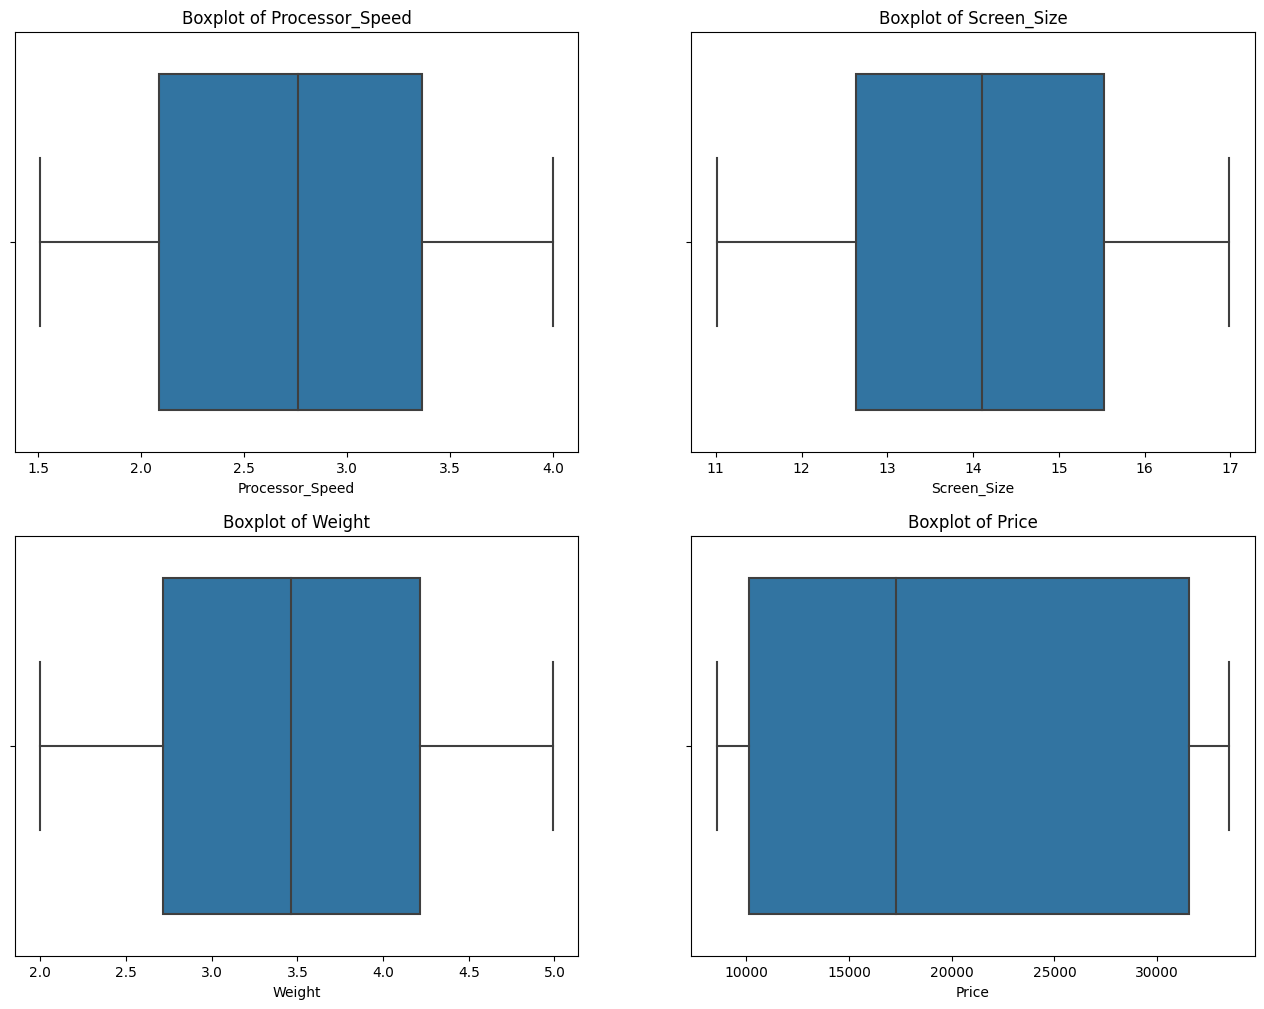

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axs=plt.subplots(2, 2, figsize=(16,12))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.boxplot(data=laptop_df, x=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel(col)

plt.show()
plt.tight_layout()

### Visualization Of Laptop Brand VS Processor Speed Sold

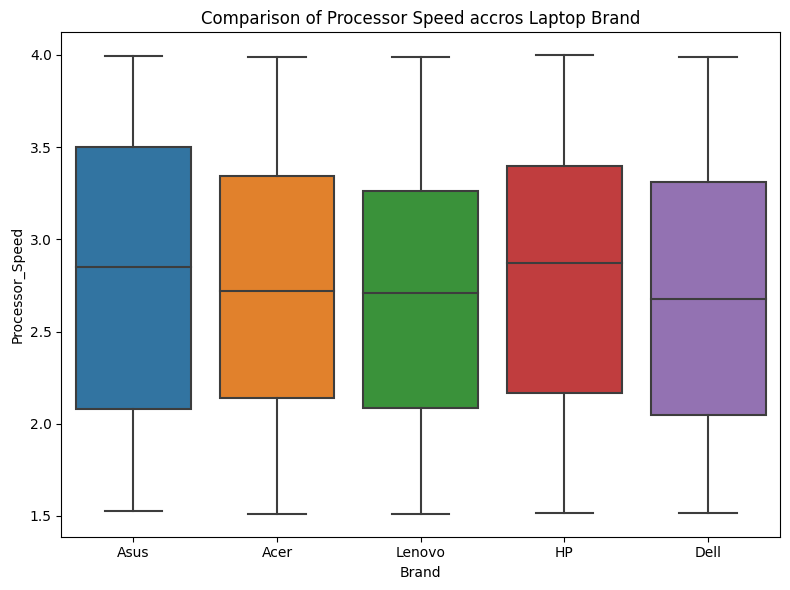

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='Processor_Speed')
plt.title('Comparison of Processor Speed accros Laptop Brand')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()


### Visualization of Laptop Brand VS RAM Size Sold

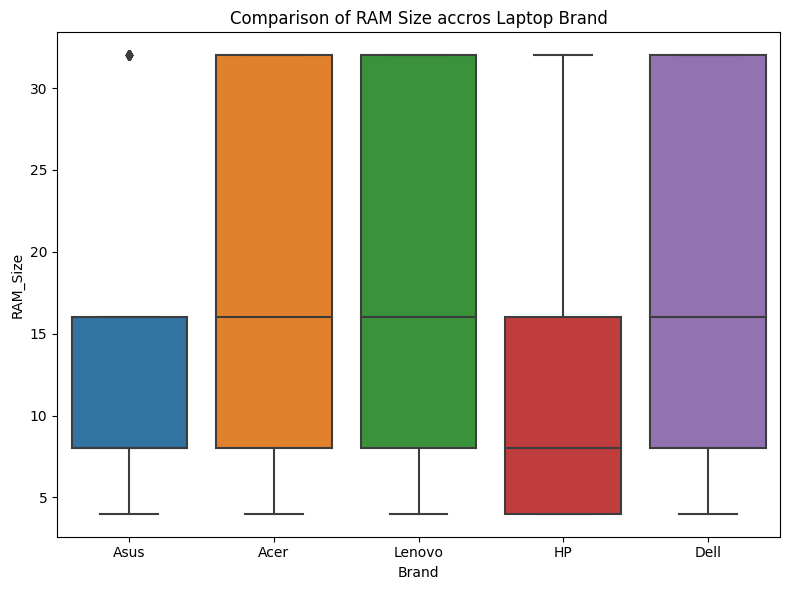

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='RAM_Size')
plt.title('Comparison of RAM Size accros Laptop Brand')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

### Visualization Of Laptop Brand VS Storage Capacity Sold

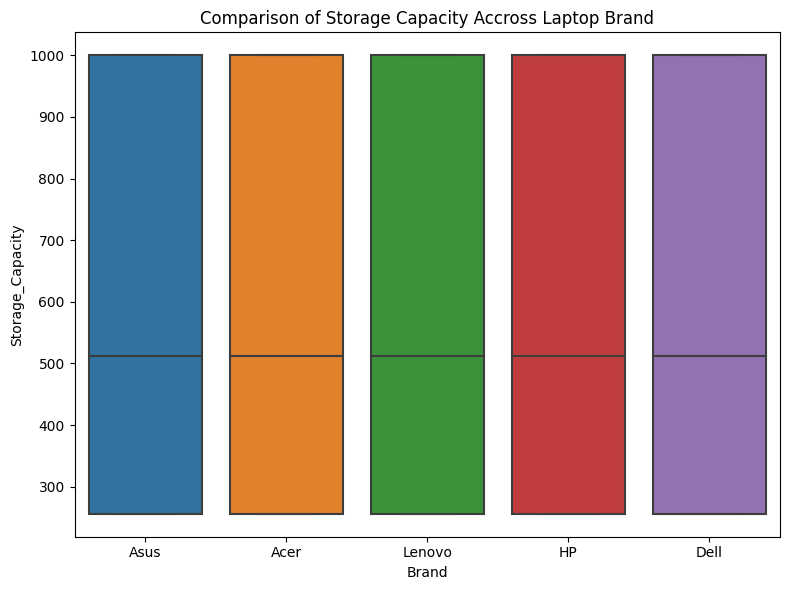

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='Storage_Capacity')
plt.title('Comparison of Storage Capacity Accross Laptop Brand')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

### Visualization of Laptop Brand VS Screen Size Sold

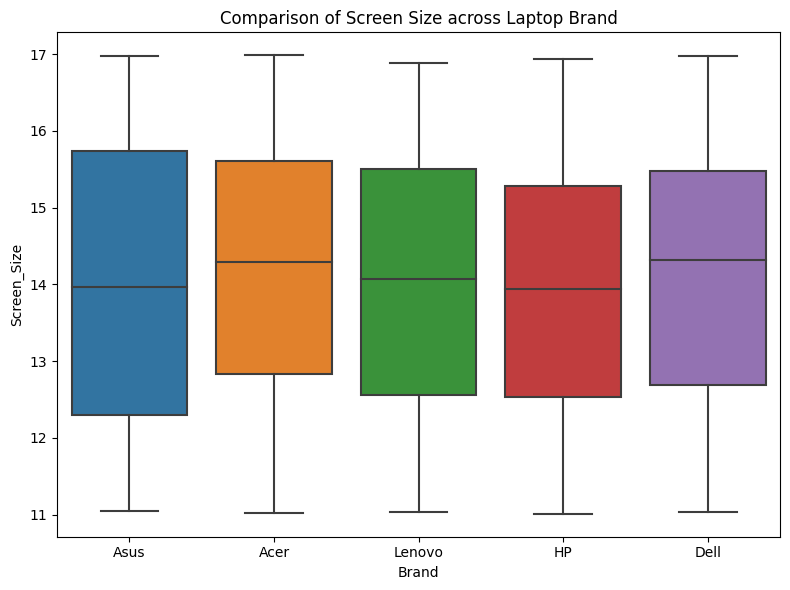

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='Screen_Size')
plt.title('Comparison of Screen Size across Laptop Brand')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

### Visualization Of Laptop Brand VS Weight Sold

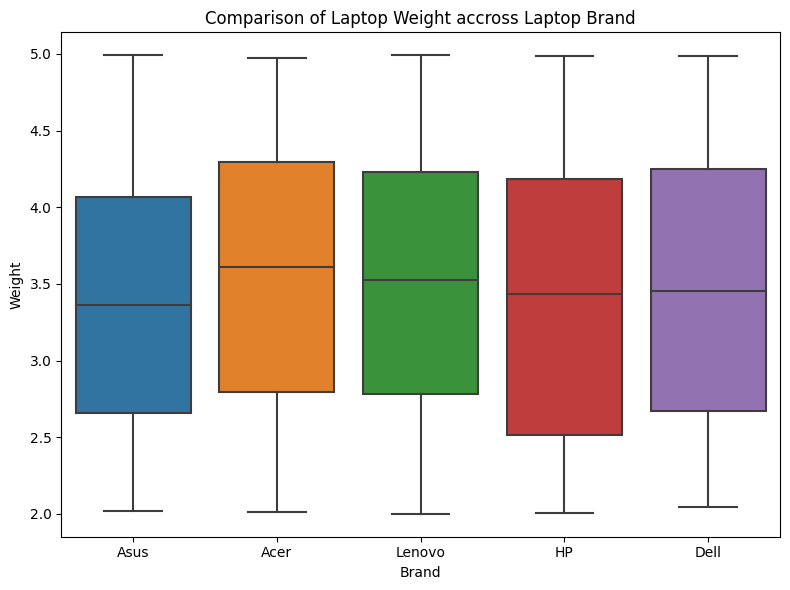

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='Weight')
plt.title('Comparison of Laptop Weight accross Laptop Brand')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

### Visualization Of Laptop Brands Versus Laptop Price

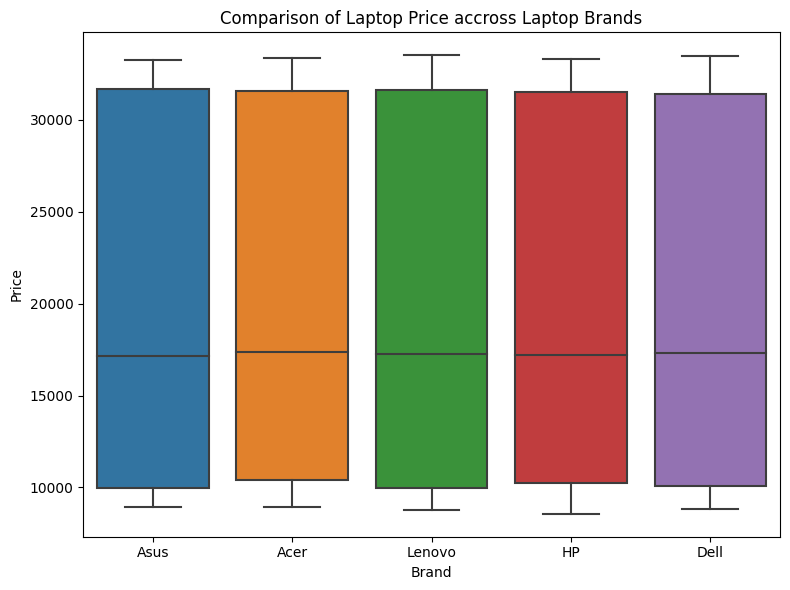

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=laptop_df, x='Brand', y='Price')
plt.title('Comparison of Laptop Price accross Laptop Brands')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

### Heatmap of Numerical Feature

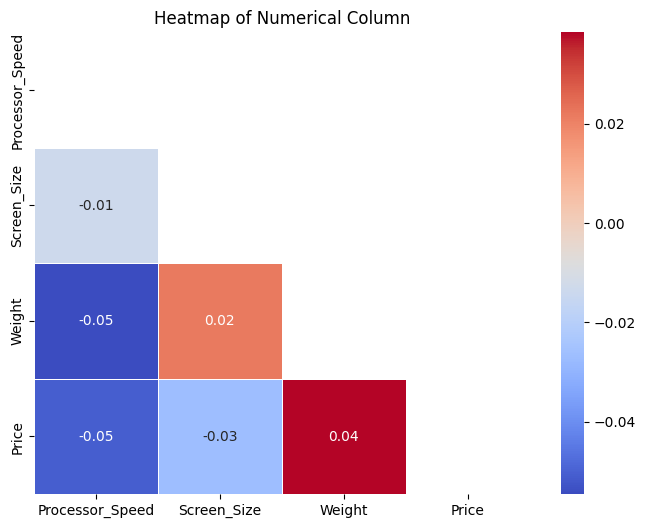

In [17]:
num_columns=laptop_df[['Processor_Speed','Screen_Size', 'Weight','Price']]
corr_num=num_columns.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Numerical Column')
plt.show()

# Preprocessing

## Encode

In [18]:
brand_encode={
    'Acer':0,
    'Asus':1,
    'Dell':2,
    'HP':3,
    'Lenovo':4
}
laptop_df['Brand']=laptop_df['Brand'].map(brand_encode)

## Normalization

In [19]:
X=laptop_df.drop(columns='Price', axis=1)
y=laptop_df['Price']

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

### Train And Test Data Split

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training Data Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f'Test Data Shape X_test: {X_test.shape}, y_test: {y_test.shape}')

Training Data Shape X_train: (800, 6), y_train: (800,)
Test Data Shape X_test: (200, 6), y_test: (200,)


# Modelling

## Linear Regression

In [22]:
Lr=LinearRegression().fit(X_train, y_train)
eval_Lr=Lr.predict(X_test)

mae_lr=mean_absolute_error(y_test, eval_Lr)
mse_lr=mean_squared_error(y_test, eval_Lr)
r2_lr=r2_score(y_test, eval_Lr)



In [23]:
Result_df=({
    "MAE":[mae_lr],
    "MSE":[mse_lr],
    "R2 Score":[r2_lr]
})
Result_df=pd.DataFrame(Result_df, index=['Linear Regression'])
Result_df

,MAE,MSE,R2 Score
Linear Regression,145.27235,31969.58247,0.999648


## Random Forest 

In [24]:
RF=RandomForestRegressor().fit(X_train, y_train)
eval_rf=RF.predict(X_test)

mae_rf=mean_absolute_error(y_test, eval_rf)
mse_rf=mean_squared_error(y_test, eval_rf)
r2_rf=r2_score(y_test, eval_rf)

In [25]:
Result_df.loc['Random Forest']=[mae_rf, mse_rf, r2_rf]
Result_df

,MAE,MSE,R2 Score
Linear Regression,145.272350,31969.582470,0.999648
Random Forest,163.792227,40617.908889,0.999553


## Decision Tree

In [26]:
Dt=DecisionTreeRegressor().fit(X_train, y_train)
eval_dt=Dt.predict(X_test)

mae_dt=mean_absolute_error(y_test, eval_dt)
mse_dt=mean_squared_error(y_test, eval_dt)
r2_dt=r2_score(y_test, eval_dt)

In [27]:
Result_df.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
Result_df

,MAE,MSE,R2 Score
Linear Regression,145.272350,31969.582470,0.999648
Random Forest,163.792227,40617.908889,0.999553
Decision Tree,225.440922,79515.842959,0.999124


## SVM

In [28]:
SVM=SVR().fit(X_train, y_train)
eval_svm=SVM.predict(X_test)

mae_svm=mean_absolute_error(y_test, eval_svm)
mse_svm=mean_squared_error(y_test, eval_svm)
r2_svm=r2_score(y_test, eval_svm)

In [29]:
Result_df.loc['SVM']=[mae_svm, mse_svm, r2_svm]
Result_df

,MAE,MSE,R2 Score
Linear Regression,145.272350,3.196958e+04,0.999648
Random Forest,163.792227,4.061791e+04,0.999553
Decision Tree,225.440922,7.951584e+04,0.999124
SVM,7925.300530,9.443664e+07,-0.040091


### Conculusion
- Linear Regression, Random Forest and Decision Tree have R2 Scores almost 1, but SVM Model cannot predict well
- All features have a significant impact on predict laptop prices